## Predicting Customer Response to Telemarketing Campaigns for Term Deposit

#### Load the Raw Data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [3]:
# Importing Dataset
raw_data = pd.read_csv(r"D:\DATA SCIENCE ASSIGNMENTS\6. LOGISTIC REGRESSION\bank-full.csv", delimiter=';')
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 2. Data Exploration <a class="anchor" id="2"></a>

#### A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [4]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Descriptive Statistics

In [5]:
raw_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### All the columns data types are correctly identified

### In Data Analysis we will analyze to find out the below stuff
 Missing values
 All the Numerical Variables
 Distribution of the Numerical Variables
 Categorical Variables
 Cardinality of Categorical Variables
 outliers
 Relationshop between independent and dependent feature (Target)

### 2.1 Missing Values <a class="anchor" id="2.1"></a>

In [7]:
raw_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

So we see that there are no missing values.

### Duplicated Values

#### print the duplicated rows

In [8]:
raw_data[raw_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [9]:
raw_data[raw_data.duplicated()].shape

(0, 17)

### Numerical Variables

In [10]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


#### Discrete Feature
+ Numerical variables are usually of 2 types 
+ Continuous variable and discrete variable

In [11]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 0


#### Continuous Variable

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [13]:
raw_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## 3. Exploratory Data Analysis<a class="anchor" id="3"></a>

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

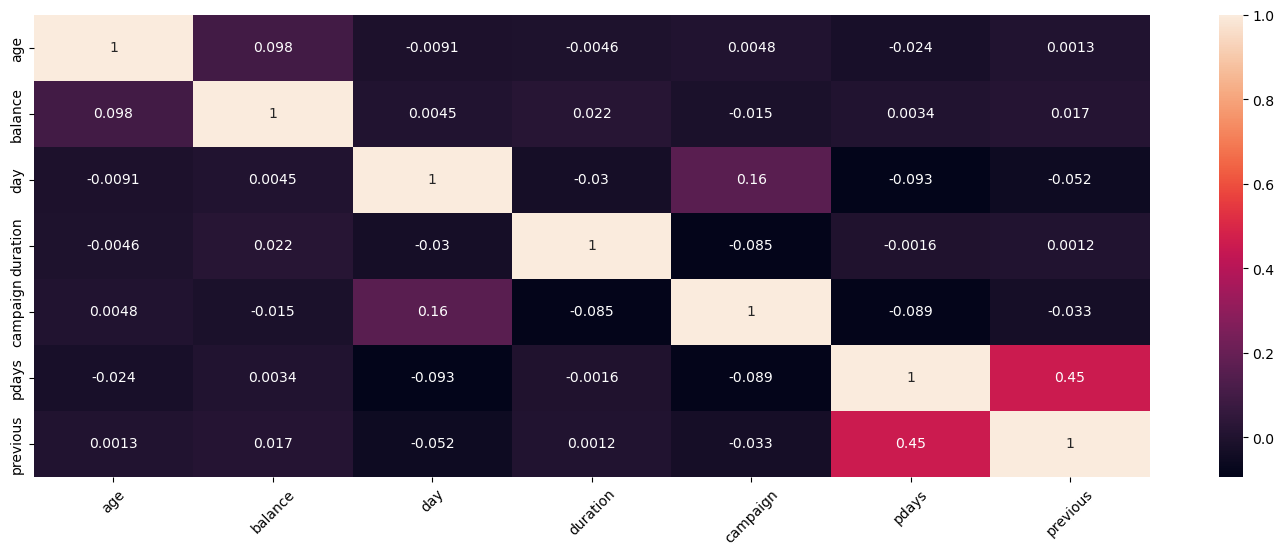

In [14]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign.

To investigate more about correlation, a correlation matrix was plotted.

### Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

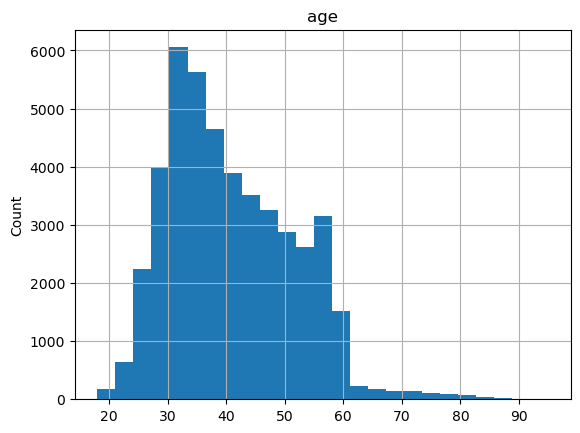

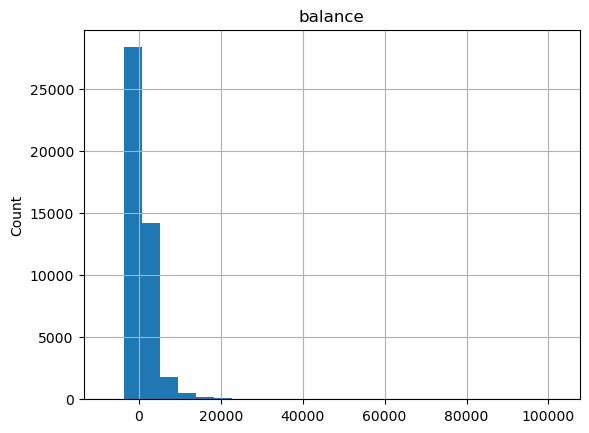

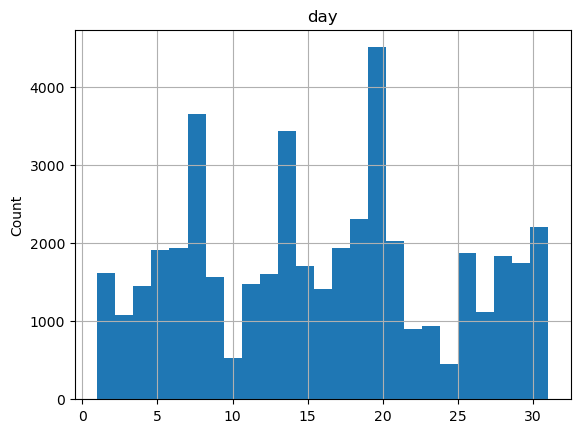

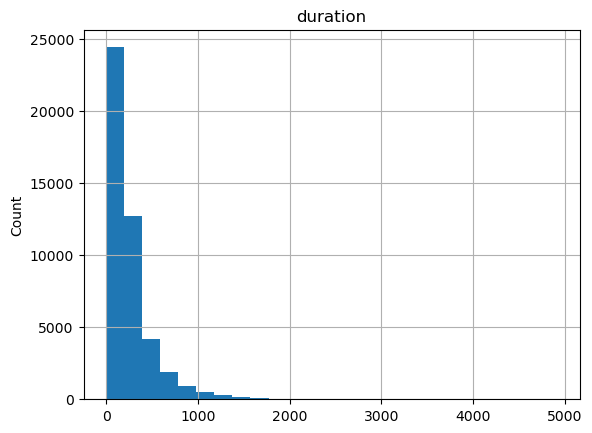

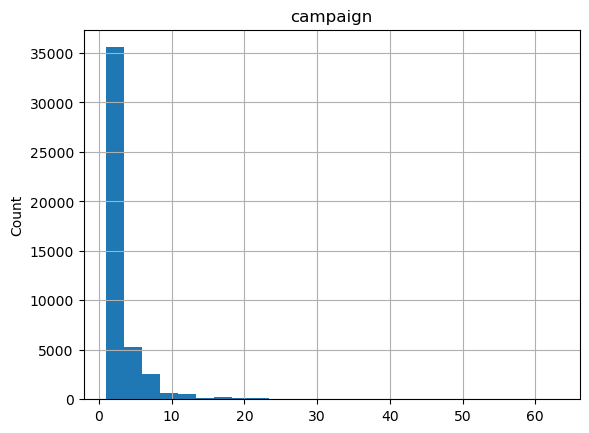

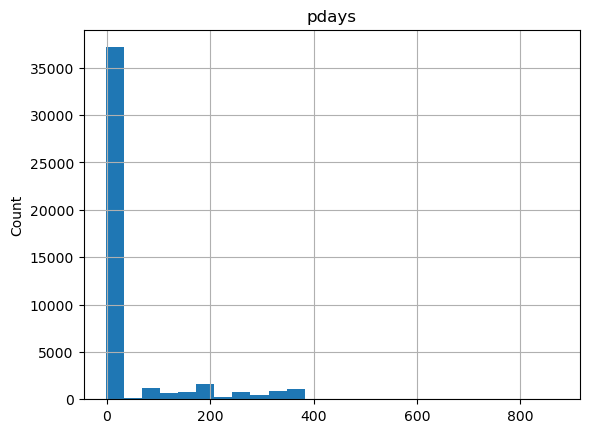

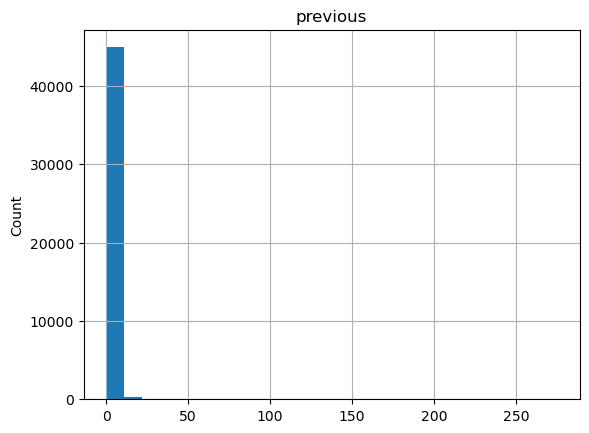

In [15]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## Log transformation
+ We will be using logarithmic transformation

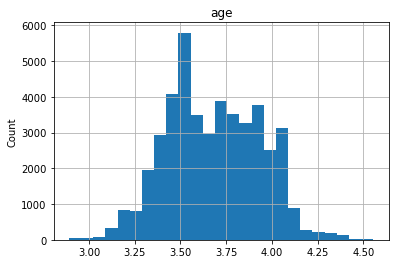

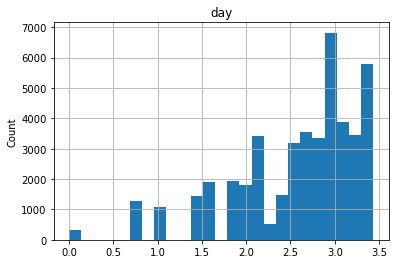

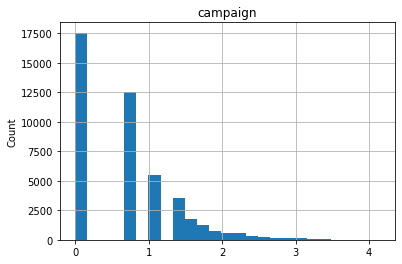

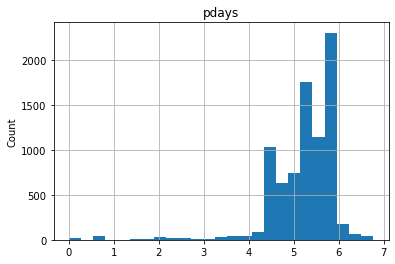

In [46]:
for feature in continuous_feature:
    data=raw_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

### 3.1 Outliers Detection<a class="anchor" id="3.1"></a>

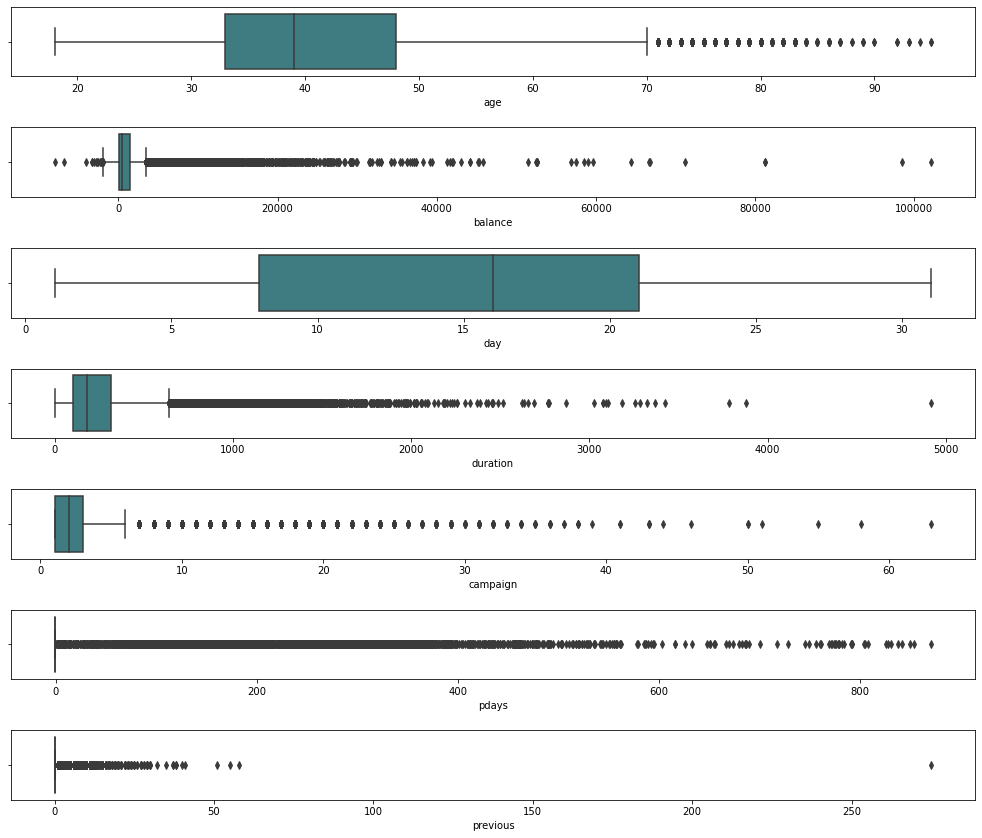

In [43]:
ot=raw_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

#### After Log-Transformation

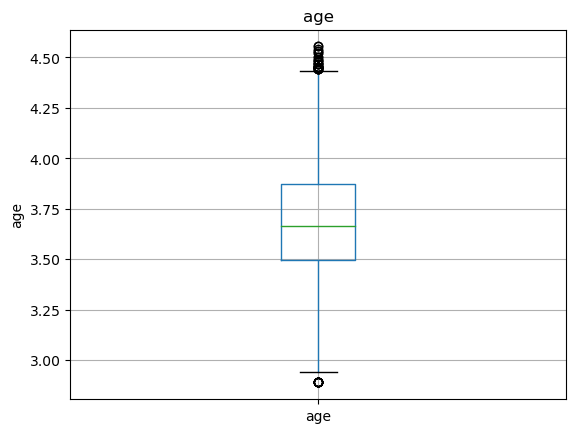

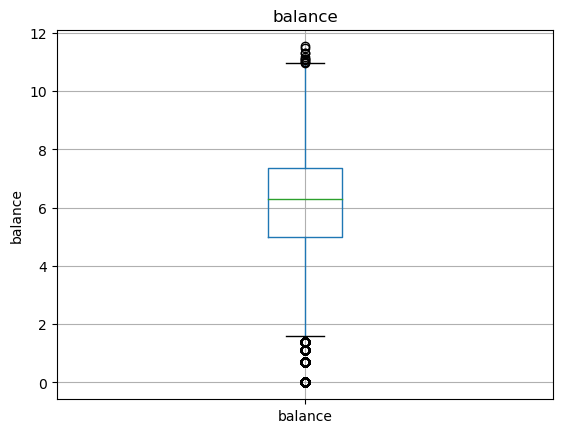

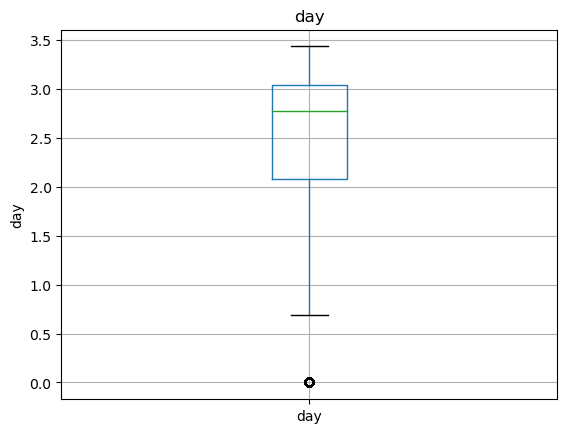

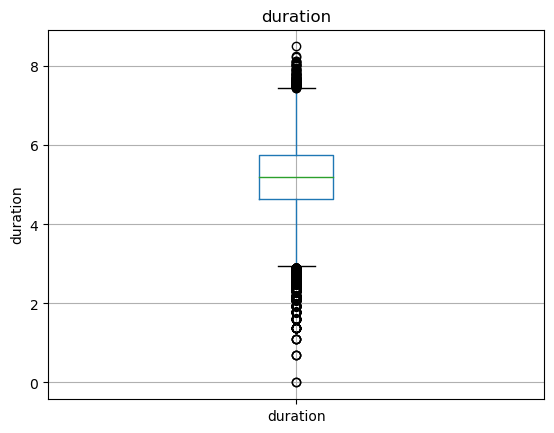

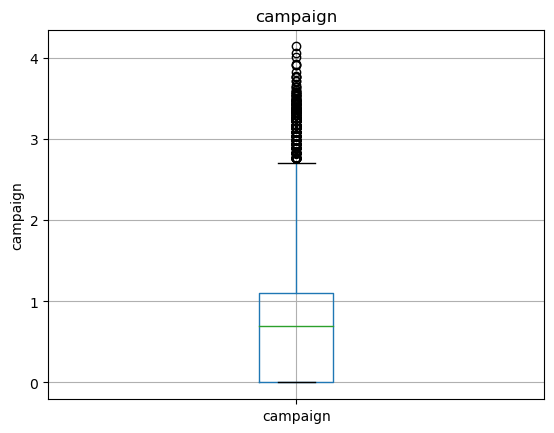

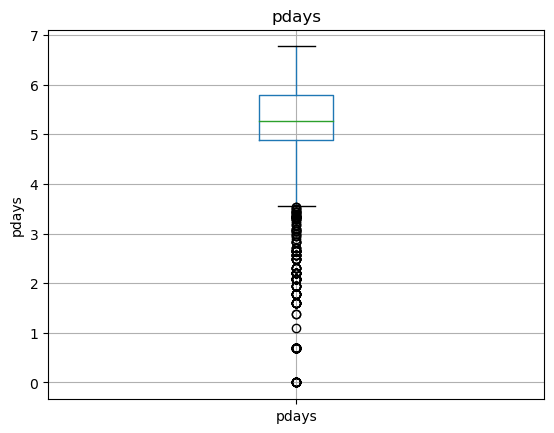

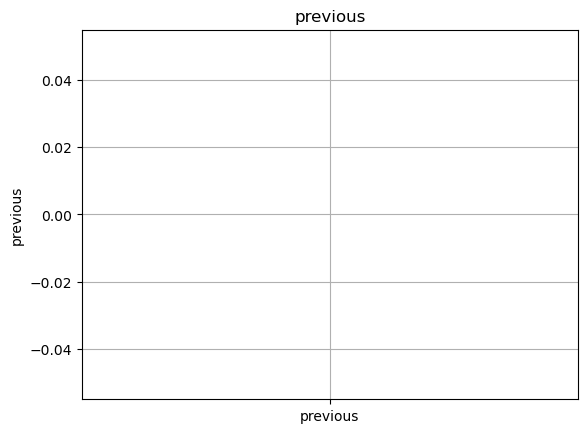

In [16]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### 3.2 Visualize the distribution of 'age' and 'balance'<a class="anchor" id="3.2"></a>

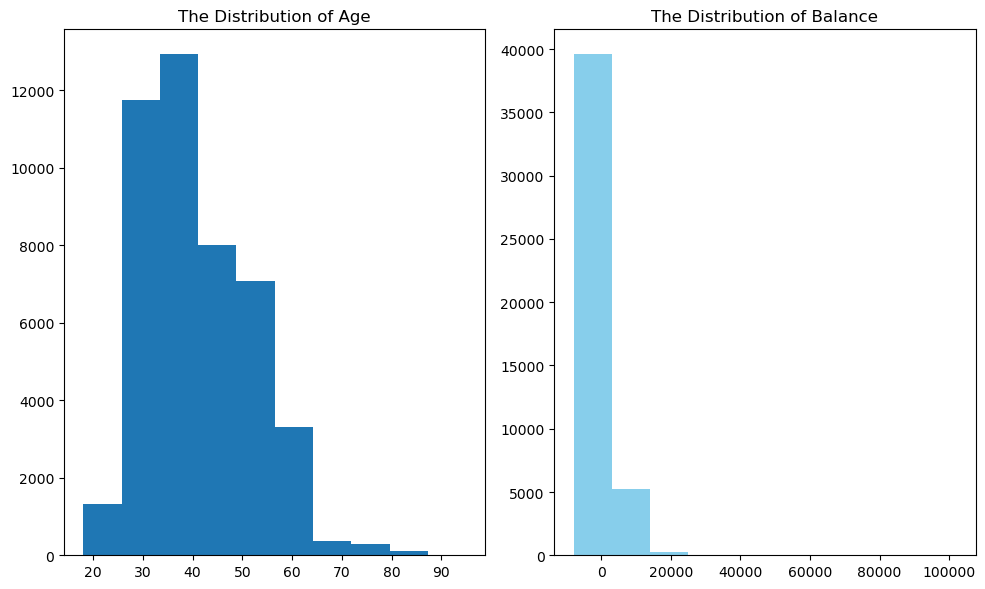

In [17]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(raw_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(raw_data['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

In [18]:
raw_data[['age','balance']].describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


+ The distribution of age: In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

+ The distribution of balance: The range of balance is still massive, from a minimum of -8019 to a maximum of 102127 euros, giving a range of 110146 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

### 3.3 Visualize the relationship between 'duration' & 'campaign' <a class="anchor" id="3.3"></a>

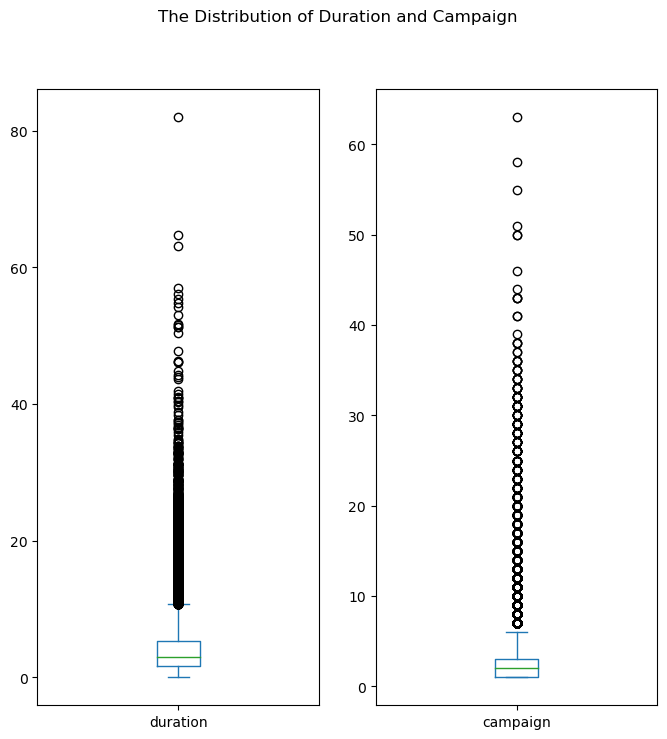

In [20]:
# Change the unit of 'duration' from seconds to minutes
df=raw_data
df1 = df.copy()
df1['duration'] = df1['duration'].apply(lambda n:n/60).round(2)
df1[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

In [21]:
df1[['duration','campaign']].describe()

,duration,campaign
count,45211.000000,45211.000000
mean,4.302729,2.763841
std,4.292132,3.098021
min,0.000000,1.000000
25%,1.720000,1.000000
50%,3.000000,2.000000
75%,5.320000,3.000000
max,81.970000,63.000000


The distribution of duration: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

### 3.4 Now let's look how numerical columns affect term deposit subscription. <a class="anchor" id="3.4"></a>

In [22]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (raw_data[raw_data['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

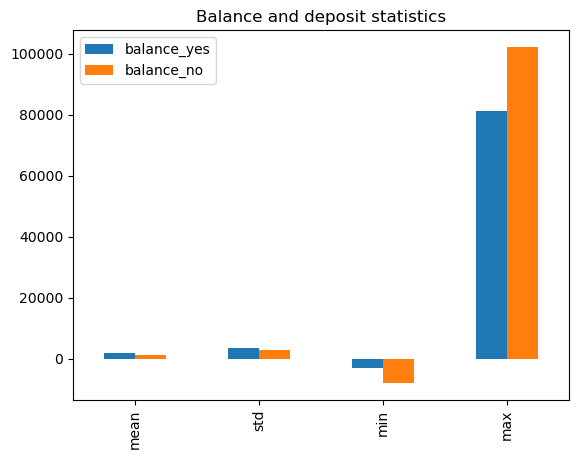

In [23]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [24]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (raw_data[raw_data['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

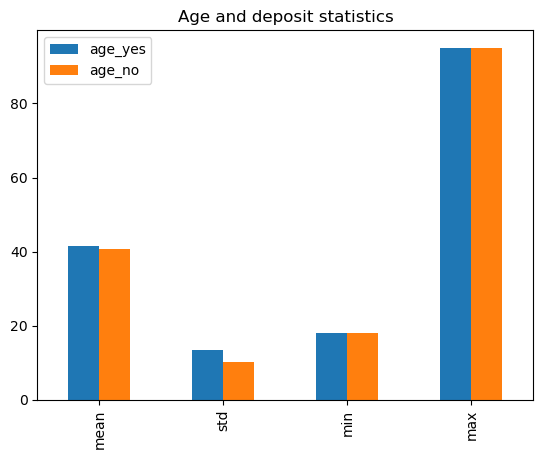

In [25]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [26]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (raw_data[raw_data['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

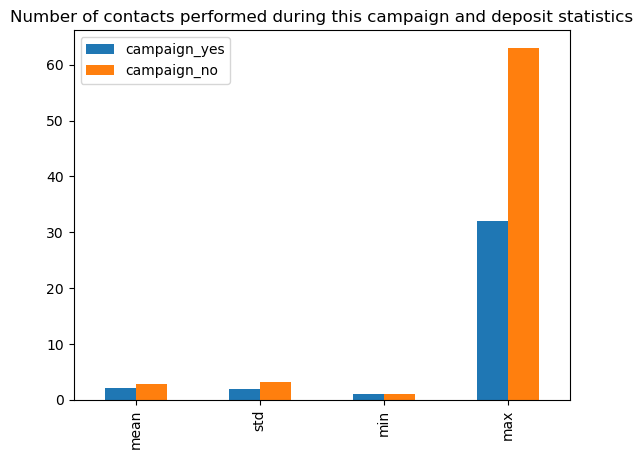

In [27]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [28]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (raw_data[raw_data['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

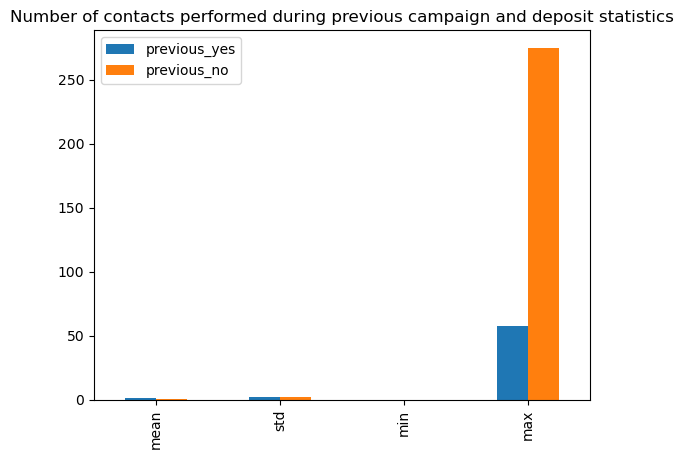

In [29]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

Looking at the diagrams above we can conclude that:

People who subscribed for term deposit tend to have greater balance and age values.
People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

### Categorical Variables

In [30]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [31]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


### 3.5 Bar plot for all categorical variables in the dataset<a class="anchor" id="3.5"></a>

Text(0.5, 1.0, 'Jobs')

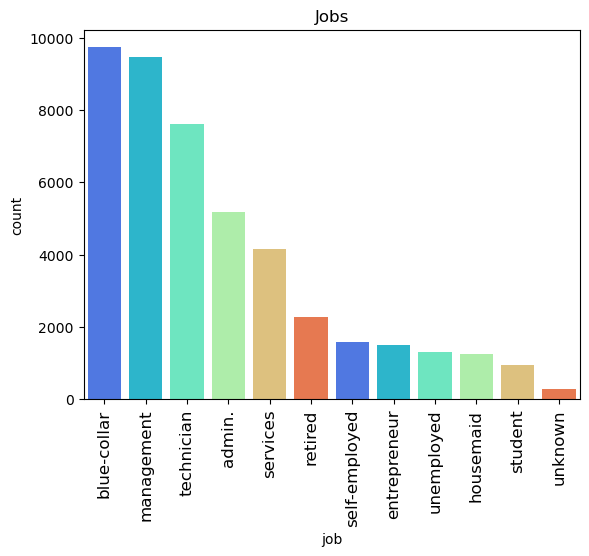

In [34]:
pal = sns.color_palette('rainbow')
sns.countplot(x='job', data=raw_data, palette = pal, 
              order=raw_data['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')

Text(0.5, 1.0, 'Marital Status')

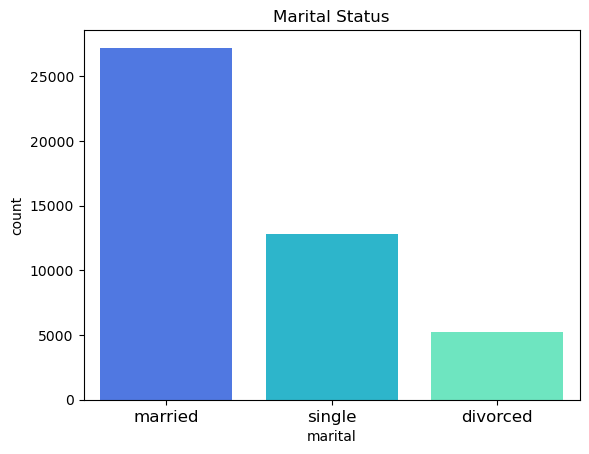

In [35]:
sns.countplot(x='marital', data=raw_data, palette = pal, 
              order=raw_data['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

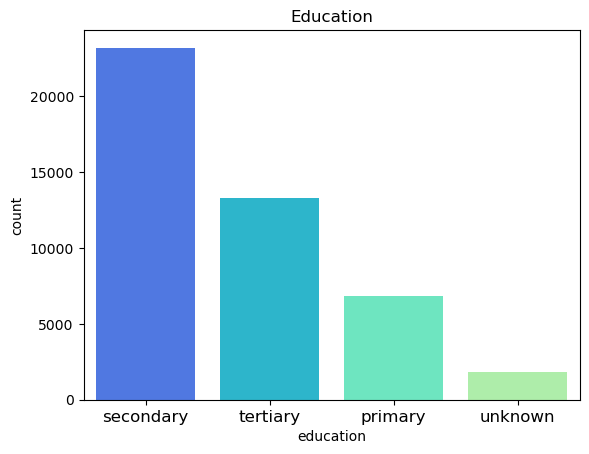

In [36]:
sns.countplot(x='education', data=raw_data, palette = pal, 
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

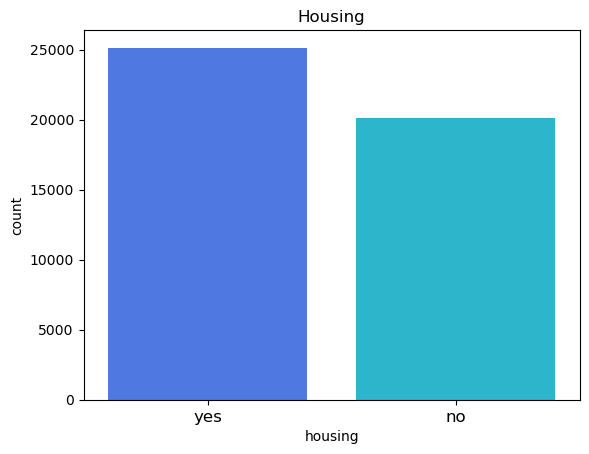

In [37]:
sns.countplot(x='housing', data=raw_data, palette = pal, 
              order=raw_data['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Housing')

Text(0.5, 1.0, 'Loan')

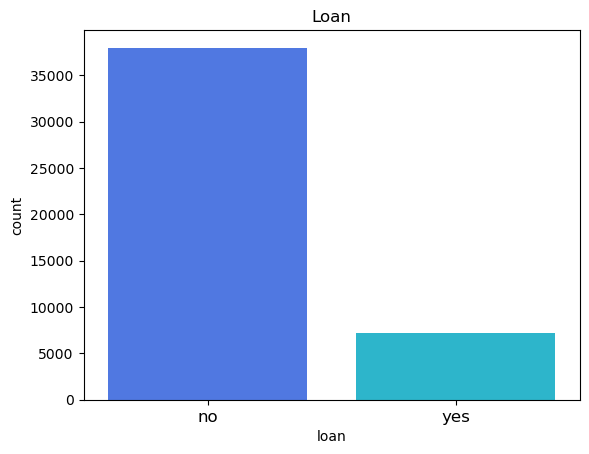

In [39]:
sns.countplot(x='loan', data=raw_data, palette = pal, 
              order=raw_data['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Loan')

### 3.6 Analysis of the response column<a class="anchor" id="3.6"></a>
It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'y' column and compare its values to other columns.
First of all we should look at the number of 'yes' and 'no' values in the response column 'y'.

#### Checking for Imbalanced or balanced dataset with regards to the Target

In [40]:
countNotermdeposit = len(raw_data[raw_data.y == 'no'])
counthavetermdeposit = len(raw_data[raw_data.y == 'yes'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(raw_data.y))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(raw_data.y))*100)))

Percentage of Customer doesn't have a term deposit: 88.30%
Percentage of Customer have a term deposit: 11.70%


In [41]:
raw_data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Whether the client has subscribed a term deposit or not ')

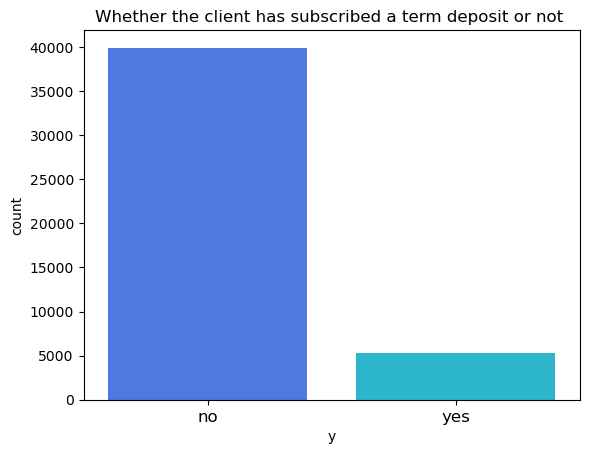

In [42]:
sns.countplot(x='y', data=raw_data, palette = pal, 
              order=raw_data['y'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has subscribed a term deposit or not ')

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset

## 4. Data Visualization<a class="anchor" id="4"></a>

#### Analyzing the relationship of categorical features with respect to the Target feature

#### Univariate Analysis

<AxesSubplot:title={'center':'Job and deposit'}>

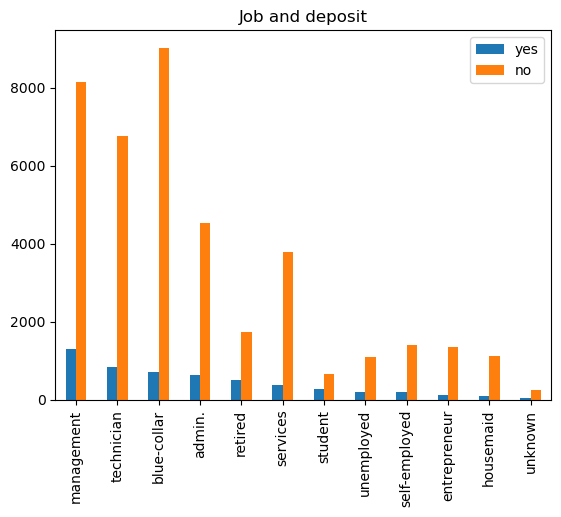

In [43]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['job'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:xlabel='y', ylabel='job'>

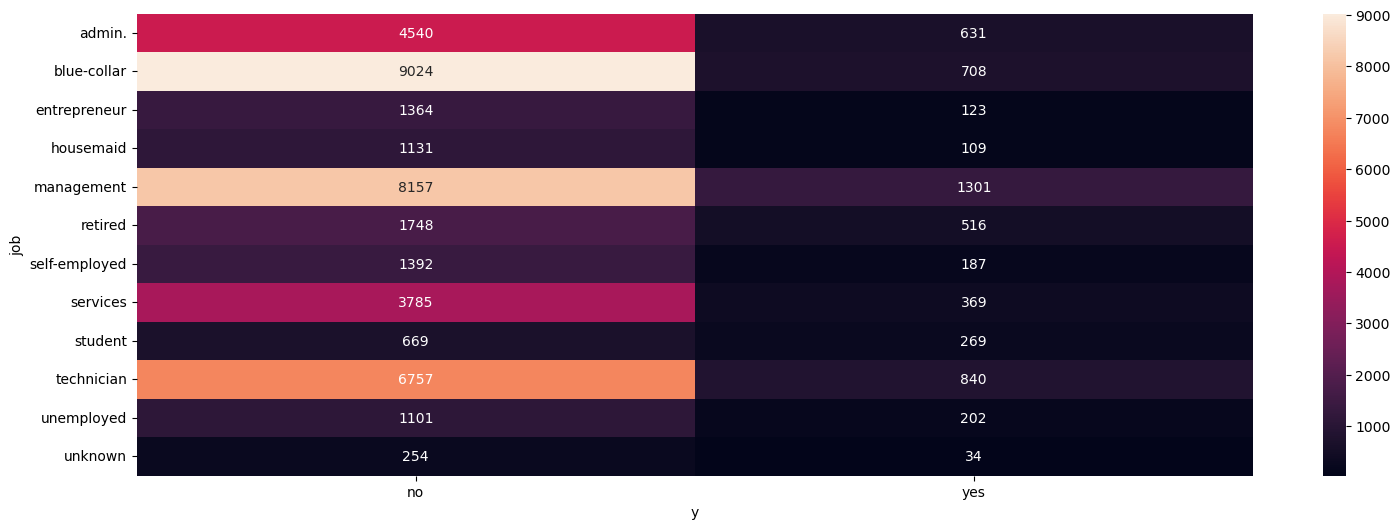

In [44]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['job'], columns=raw_data['y']), annot=True, 
            fmt='g')

<AxesSubplot:title={'center':'Marital status and deposit'}>

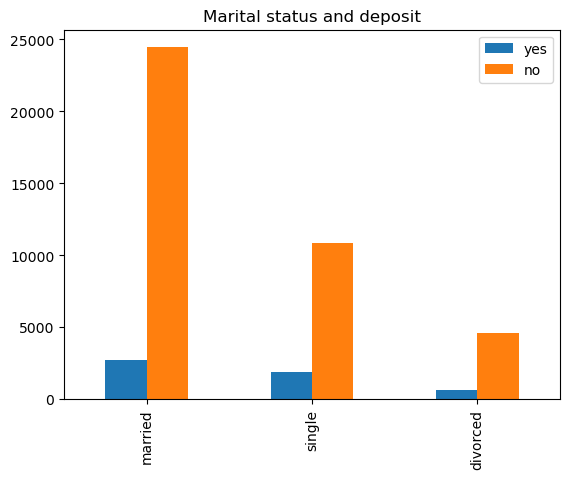

In [45]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['marital'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:xlabel='y', ylabel='marital'>

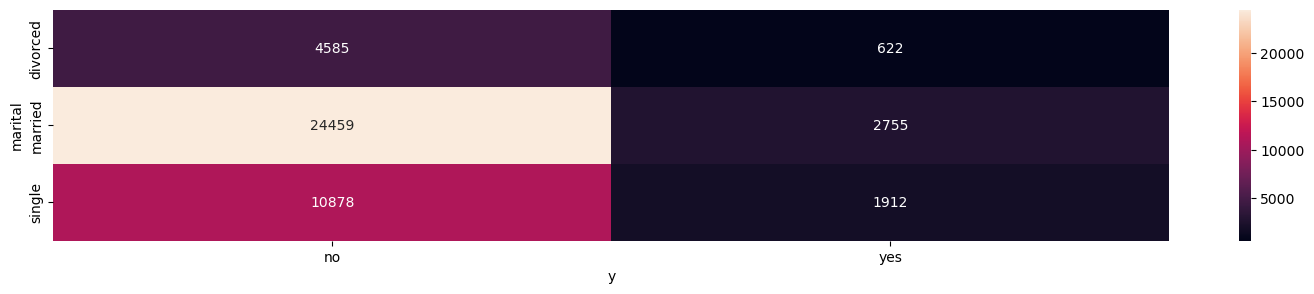

In [46]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['marital'], columns=raw_data['y']), annot=True, 
            fmt='g')

<AxesSubplot:title={'center':'Education and deposit'}>

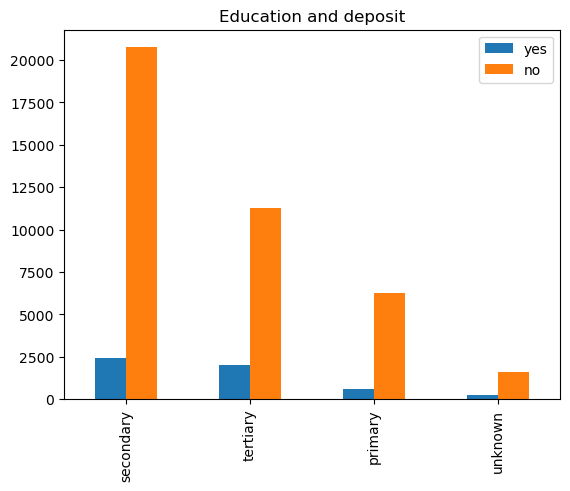

In [47]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['education'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:xlabel='y', ylabel='education'>

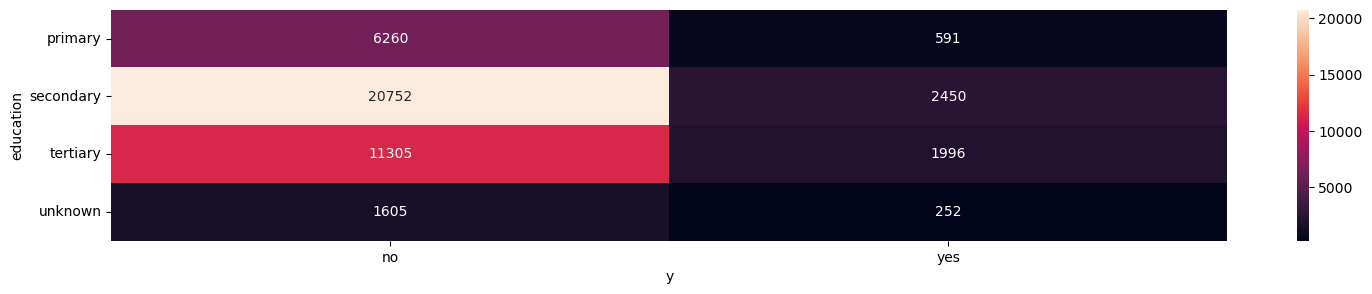

In [48]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['y']), annot=True, 
            fmt='g')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

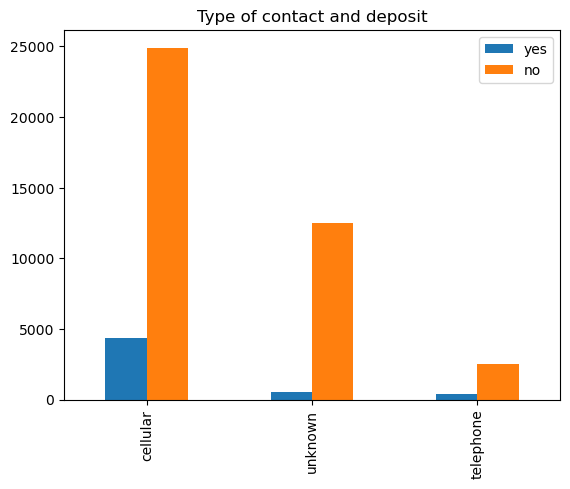

In [49]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['contact'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

<AxesSubplot:xlabel='y', ylabel='contact'>

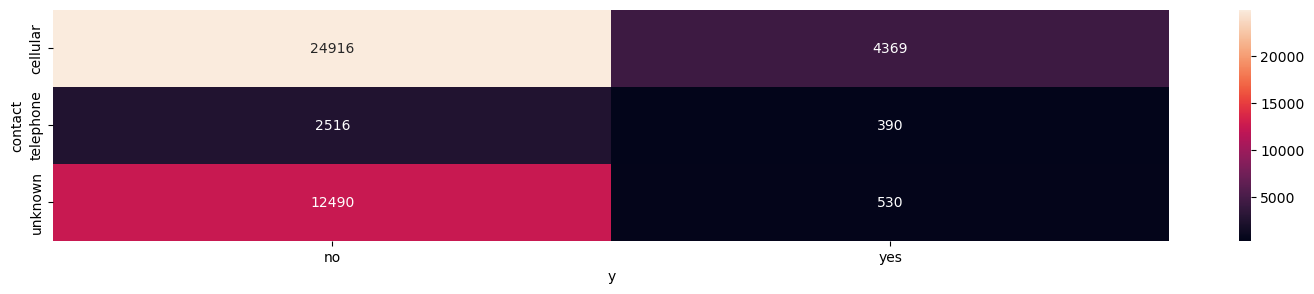

In [50]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['contact'], columns=raw_data['y']), annot=True, 
            fmt='g')

<AxesSubplot:title={'center':'Type of possible outcome and deposit'}>

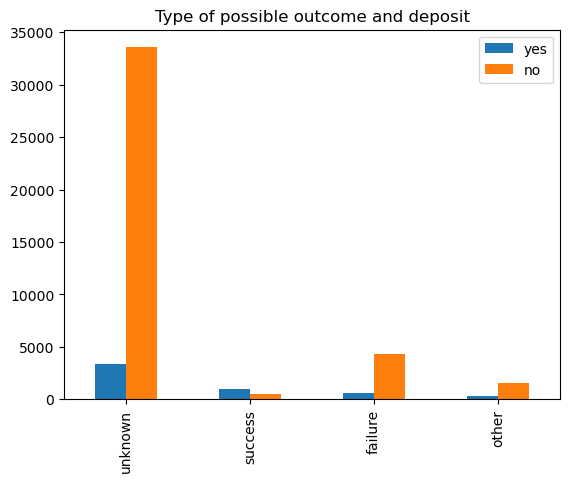

In [51]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['poutcome'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['poutcome'].value_counts()

j_df.plot.bar(title = 'Type of possible outcome and deposit')

<AxesSubplot:xlabel='y', ylabel='poutcome'>

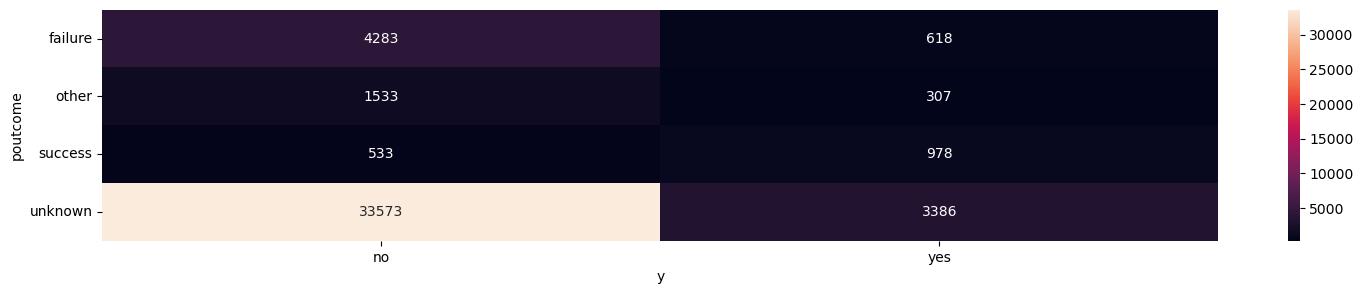

In [52]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['poutcome'], columns=raw_data['y']), annot=True, 
            fmt='g')

<AxesSubplot:title={'center':'Loan and deposit'}>

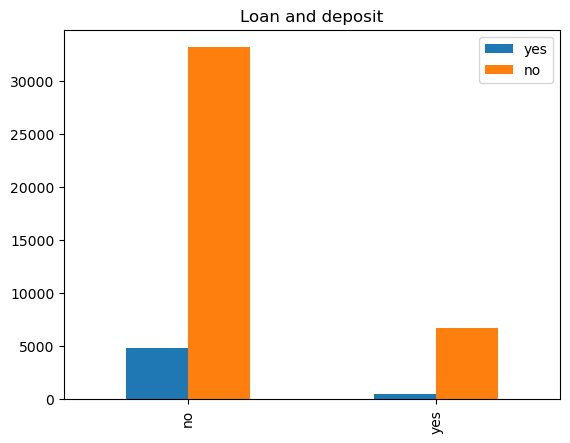

In [53]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = raw_data[raw_data['y'] == 'yes']['loan'].value_counts()
j_df['no'] = raw_data[raw_data['y'] == 'no']['loan'].value_counts()

j_df.plot.bar(title = 'Loan and deposit')

<AxesSubplot:xlabel='y', ylabel='loan'>

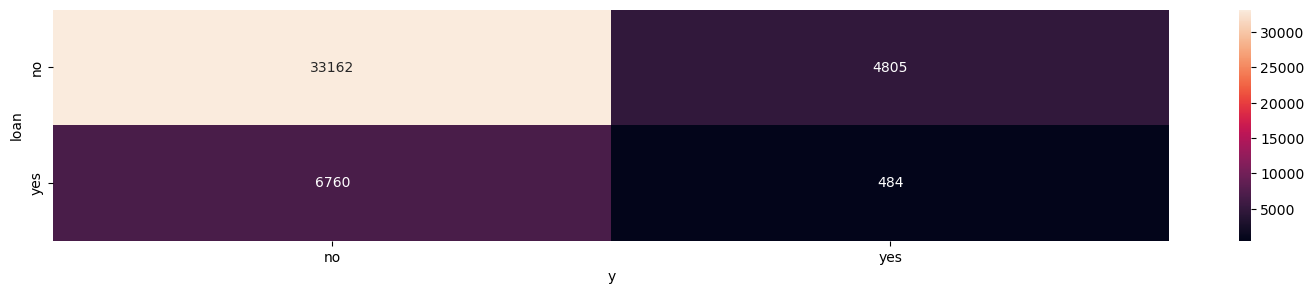

In [54]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['loan'], columns=raw_data['y']), annot=True, 
            fmt='g')

Regarding the diagrams we can tell that according to our dataset:

Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
Married customers are less likely to subscribe for term deposit.
Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

### 4.1 Analyzing Relation by plotting Continuous features with the Target Feature<a class="anchor" id="4.1"></a>

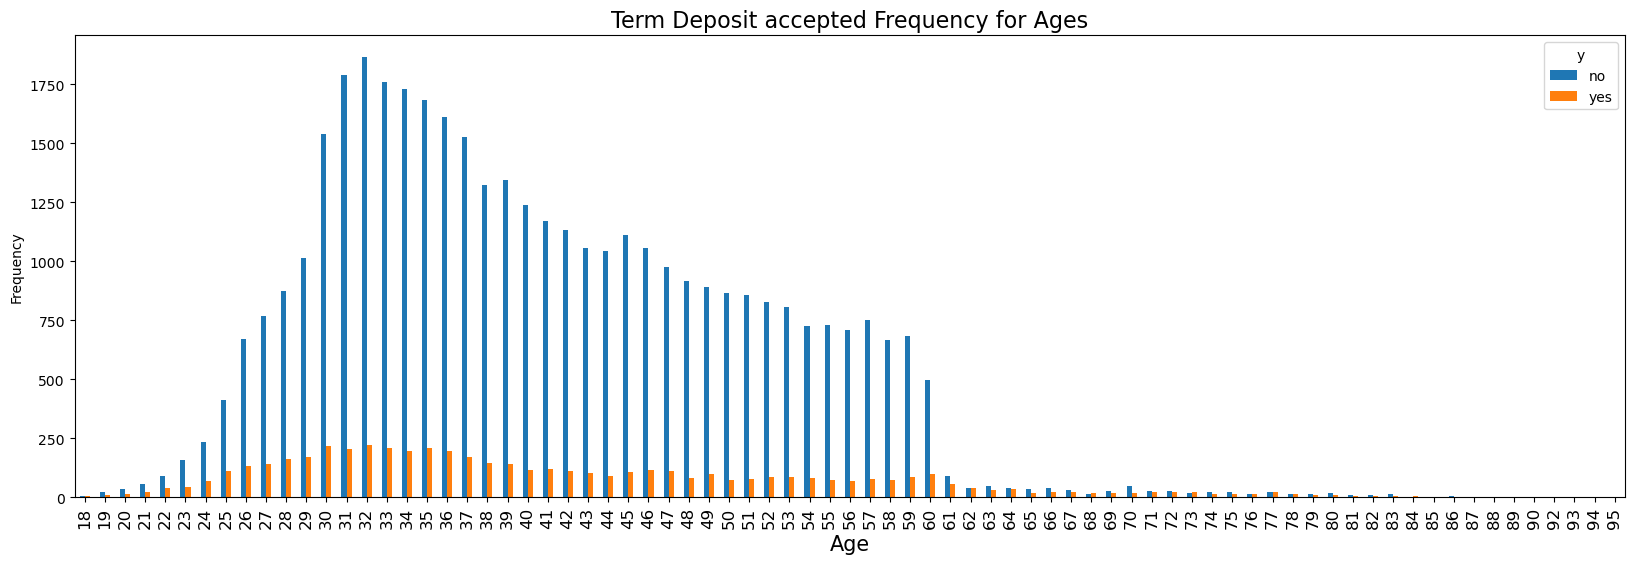

In [55]:
pd.crosstab(raw_data.age,raw_data.y).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

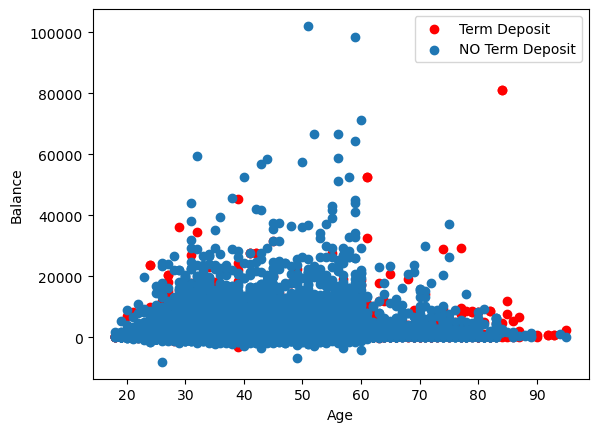

In [56]:
plt.scatter(x=raw_data.age[raw_data.y== 'yes'], y=raw_data.balance[(raw_data.y== 'yes')], c="red")
plt.scatter(x=raw_data.age[raw_data.y== 'no'], y=raw_data.balance[(raw_data.y== 'no')])
plt.legend(["Term Deposit", "NO Term Deposit"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

### 4.2 Visualize the subscription and contact rate by age <a class="anchor" id="4.2"></a>

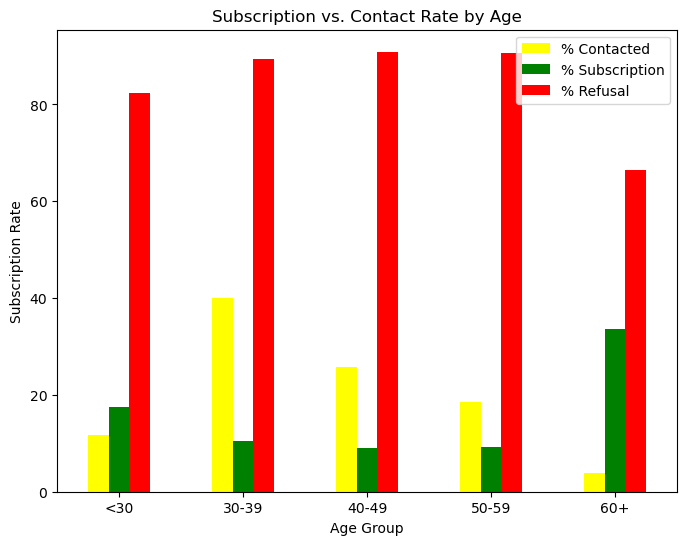

In [57]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['y'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age['% Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Contacted','% Subscription','% Refusal']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('yellow','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

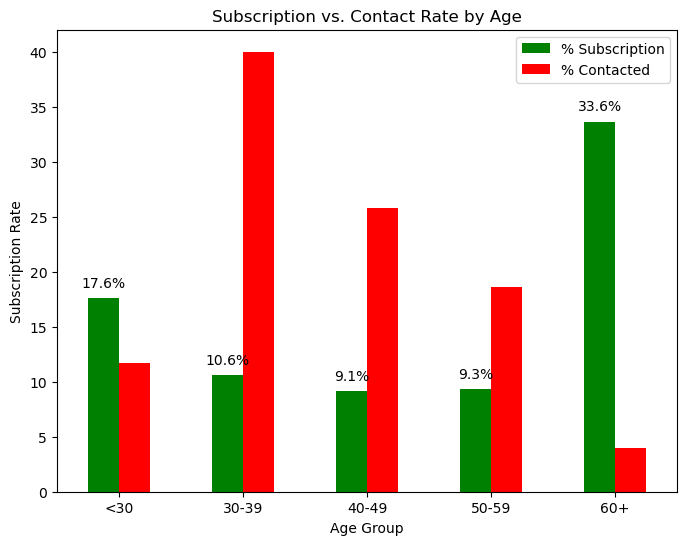

In [58]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['y'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

+ Insights: target the youngest and the oldest instead of the middle-aged

Green vertical bars indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

### 4.3 Visualize the subscription rate by balance level<a class="anchor" id="4.3"></a>

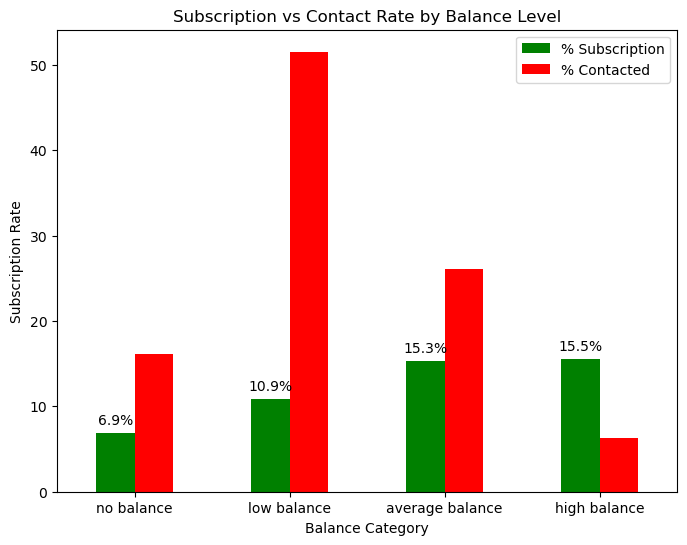

In [59]:
lst = [raw_data]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(raw_data['y'],raw_data['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

Insights: target clients with average or high balance

To identify the trend more easily, clients are categorized into four groups based on their levels of balance:

+ No Balance: clients with a negative balance.
+ Low Balance: clients with a balance between 0 and 1000 euros
+ Average Balance: clients with a balance between 1000 and 5000 euros.
+ High Balance: clients with a balance greater than 5000 euros.

Unsurprisingly, this bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, nearly 15%.

However, in this campaign, more than 50% of clients contacted only have a low balance level. In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits.

### 4.4 Visualize the subscription rate by age and balance<a class="anchor" id="4.4"></a>

In [60]:
# Step 1: Change column name: 'y' to 'response'
df  =raw_data.copy()
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

convert(df, "response_binary", "response")

0    39922
1     5289
Name: response_binary, dtype: int64

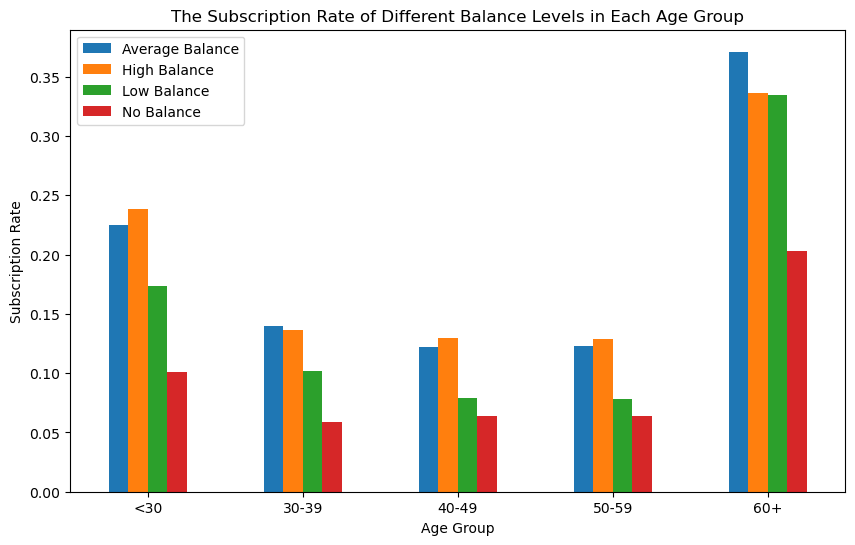

In [61]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

<b>Insights: target older clients with high balance levels</b>

While age represents a person’s life stage and balance represents a person’s financial condition, jointly evaluating the impact of these two factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates the highest likelihood of subscription.

In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group.

+ The graph tells the same story regarding the subscription rate for different age groups: <b>the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30</b> also have a distinguishable higher subscription rate than those of other age groups.
    
+ Furthermore, <b>the effect of balance levels on subscription decision is applicable to each individual age group:</b> every age group shares a common trend that the percentage of subscription increases with balance.

In sum, the bank should <b>prioritize its telemarketing to clients who are above 60 years old and have positive balances</b>, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is <b>young clients with positive balances</b>, who showed high subscription rates between 15% and 20%.

### 4.5 Visualize the subscription rate by job<a class="anchor" id="4.5"></a>

In [62]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


In [63]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

response,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


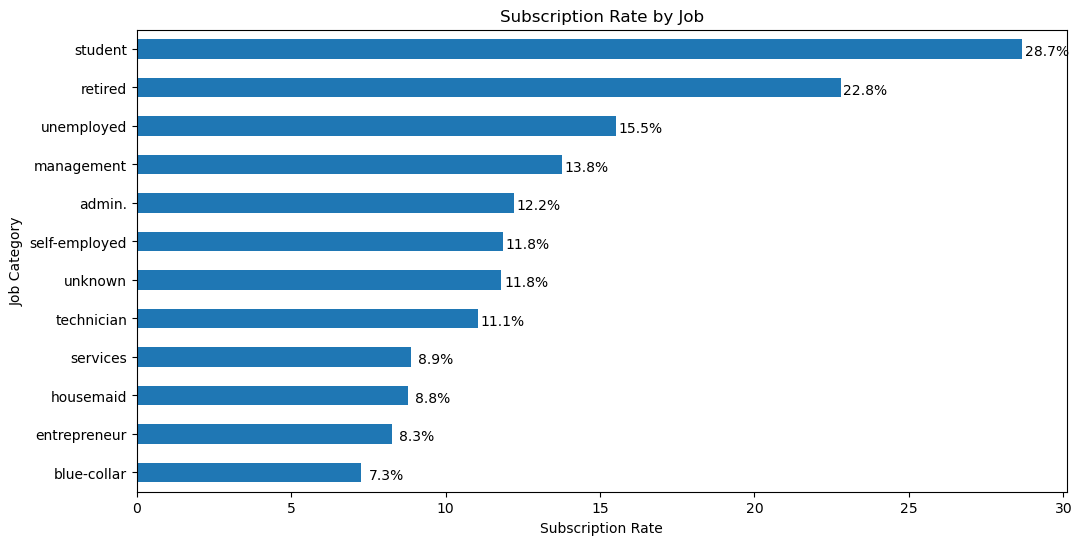

In [64]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<b>Insights: target students and retired clients

As noted from the horizontal bar chart, students and retired clients account have more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

### 4.6 Visualize the relationship between 'duration' & 'campaign': with response result<a class="anchor" id="4.6"></a>

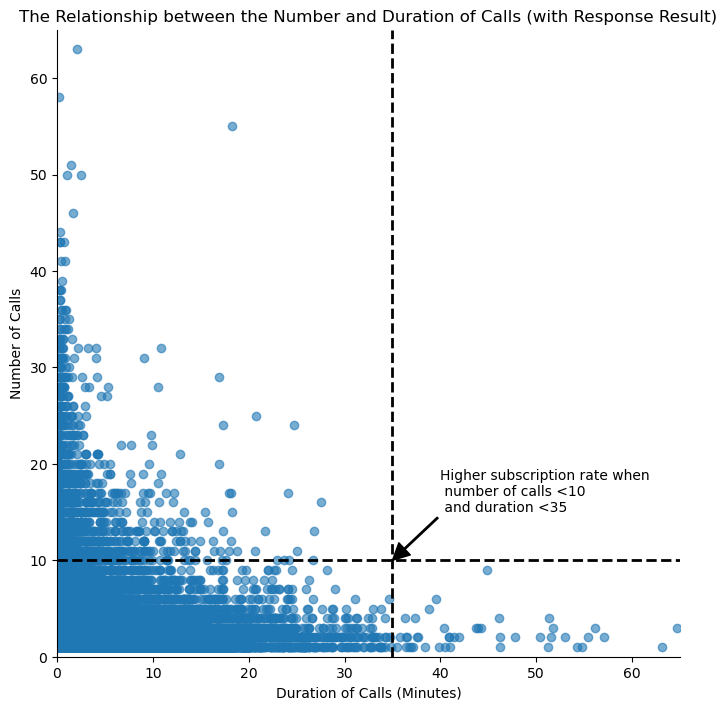

In [67]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df1,
                    
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=10, linewidth=2, color="k", linestyle='--')
plt.axvline(x=35, linewidth=2, color="k", linestyle='--' )
plt.annotate("Higher subscription rate when \n number of calls <10 \n and duration <35",xytext = (40,15),
             arrowprops=dict(color = 'k', width=1),xy=(35,10))
plt.show()

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after 6 campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

#### Visualize the subscription rate by Education

In [90]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [72]:
count_education_response_pct = pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
count_education_response_pct

response,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


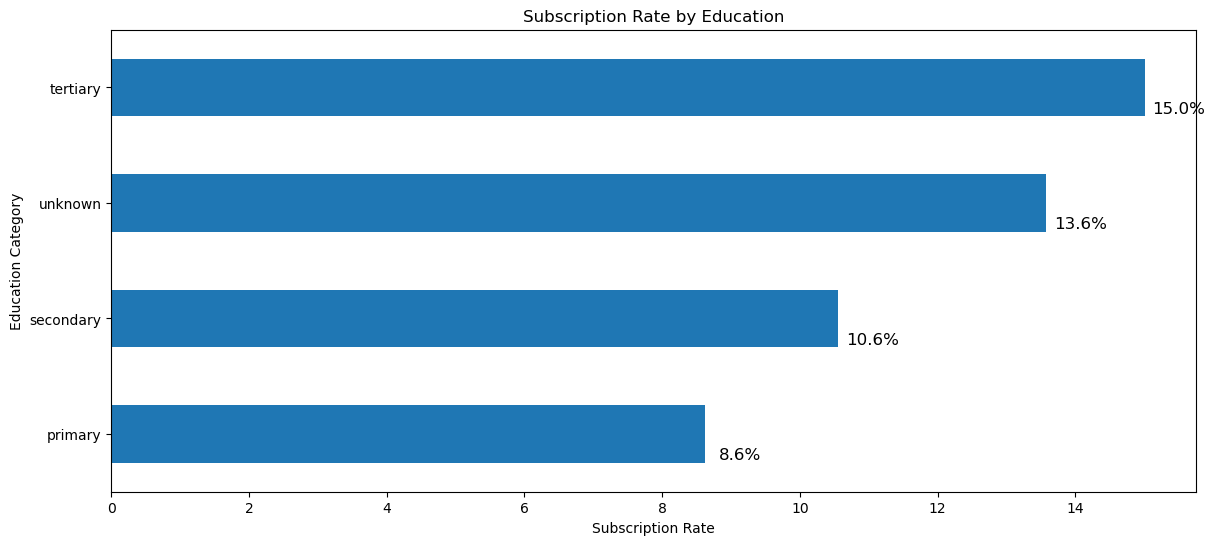

In [73]:
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,6))
                                                                               
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom',
                fontsize = 'large')

#### 'Unkown' values were found in some of the features
+ We need to handle those values

In [74]:
cols = [col for col in raw_data.columns]
col_missing = []
for col in cols:
    if 'unknown' in raw_data[col].values:
        col_missing.append(col)
        
print("Columns with Unknown Values -",col_missing) 

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


In [75]:
print("Unknown values count")
for col in col_missing:
    print(col,"-",raw_data[raw_data[col].str.contains('unknown')][col].count())

Unknown values count
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [76]:
print(raw_data.groupby(raw_data['job'])['job'].count(),"\n")

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 



In [77]:
print(raw_data.groupby(raw_data['education'])['education'].count(),"\n")

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 



In [78]:
print(raw_data.groupby(raw_data['poutcome'])['poutcome'].count(),"\n")

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



In [79]:
print(raw_data.groupby(raw_data['contact'])['contact'].count(),"\n")

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 



### 5.1 Creating and transforming data<a class="anchor" id="5.1"></a>

In [80]:
df = raw_data.copy()

In [81]:
# Step 2: Replace 'unknown' in job and education with 'other'
df[['job','education','contact','poutcome']] = df[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [82]:
df.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [83]:
# Custom Binary Encoding of Binary o/p variables 
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0,50.0,average balance
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0,40.0,low balance
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0,30.0,low balance
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0,40.0,average balance
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0,30.0,low balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,other,1,50.0,low balance
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,other,1,60.0,average balance
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,60.0,high balance
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,other,0,50.0,low balance


### Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [84]:
# One-Hot Encoding of categrical variables
# df=pd.get_dummies(df,columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
# To see all columns
# pd.set_option("display.max.columns", None)
# df

In [85]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome,balance_group
0,management,married,tertiary,other,may,other,average balance
1,technician,single,secondary,other,may,other,low balance
2,entrepreneur,married,secondary,other,may,other,low balance
3,blue-collar,married,other,other,may,other,average balance
4,other,single,other,other,may,other,low balance


In [86]:
categorical.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [87]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [88]:
# concatination of two dataframes 'bank' and 'dummies'
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)

In [89]:
# To see all columns
pd.set_option("display.max.columns", None)
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,58,0,2143,1,0,5,261,1,-1,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,50.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,60.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,60.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,50.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [90]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'age_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_other', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_other',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'balance_group_average balance',
       'balance_group_high balance', 'balance_group_low balance',
       'balance_group_no balance'],
      dtype='object')

In [91]:
df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']]=df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            45211 non-null  int64  
 1   default                        45211 non-null  int64  
 2   balance                        45211 non-null  int64  
 3   housing                        45211 non-null  int64  
 4   loan                           45211 non-null  int64  
 5   day                            45211 non-null  int64  
 6   duration                       45211 non-null  int64  
 7   campaign                       45211 non-null  int64  
 8   pdays                          45211 non-null  int64  
 9   previous                       45211 non-null  int64  
 10  y                              45211 non-null  int64  
 11  age_group                      45211 non-null  float64
 12  job_admin.                     45211 non-null 

In [92]:
# Label Encoding Technique

In [93]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

In [96]:
# Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,58,0,2143,1,0,5,4.35,1,-1,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,44,0,29,1,0,5,2.52,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,5,1.27,1,-1,0,0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,5,1.53,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,33,0,1,0,0,5,3.30,1,-1,0,0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


### Applying Standard Scaler
+ For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
+ x_scaled = x – mean/std_dev
+ However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [97]:
from sklearn.preprocessing import StandardScaler

df_standard_scaled = df.copy()
column_name= ['balance','age','duration']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()

,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,y,age_group,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,balance_group_average balance,balance_group_high balance,balance_group_low balance,balance_group_no balance
0,0.256419,1.606965,0.011014,0,1,0,5,1,-1,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,-0.437895,0.288529,-0.415353,0,1,0,5,1,-1,0,0,40.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,-0.446762,-0.747384,-0.706586,0,1,1,5,1,-1,0,0,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0.047205,0.571051,-0.646010,0,1,0,5,1,-1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,-0.447091,-0.747384,-0.233623,0,0,0,5,1,-1,0,0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


### 6. Feature Selection<a class="anchor" id="6"></a>
####  Recursive Feature Elimination
##### For feature selection, we wil use the Recursive Feature Elimination (RFE).

#### We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [98]:
x = df_standard_scaled.drop('y', 1)
y = df_standard_scaled['y']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [100]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 52)
Shape of X_test:  (9043, 52)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


In [101]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [102]:
# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [103]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False  True False False False  True
 False  True  True  True  True False  True  True  True  True  True  True
 False False False False]
[33 28  1 17  1  3 37 24 38 34 29 25 14 13  9 20 15  6 19 16  1 21 32 31
 10 30 36  7 26 18  4  1  5 35  2  1 12  1  1  1  1 11  1  1  1  1  1  1
 22 23 27  8]


In [104]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('balance', False, 33),
 ('age', False, 28),
 ('duration', True, 1),
 ('default', False, 17),
 ('housing', True, 1),
 ('loan', False, 3),
 ('day', False, 37),
 ('campaign', False, 24),
 ('pdays', False, 38),
 ('previous', False, 34),
 ('age_group', False, 29),
 ('job_admin.', False, 25),
 ('job_blue-collar', False, 14),
 ('job_entrepreneur', False, 13),
 ('job_housemaid', False, 9),
 ('job_management', False, 20),
 ('job_other', False, 15),
 ('job_retired', False, 6),
 ('job_self-employed', False, 19),
 ('job_services', False, 16),
 ('job_student', True, 1),
 ('job_technician', False, 21),
 ('job_unemployed', False, 32),
 ('marital_divorced', False, 31),
 ('marital_married', False, 10),
 ('marital_single', False, 30),
 ('education_other', False, 36),
 ('education_primary', False, 7),
 ('education_secondary', False, 26),
 ('education_tertiary', False, 18),
 ('contact_cellular', False, 4),
 ('contact_other', True, 1),
 ('contact_telephone', False, 5),
 ('month_apr', False, 35),
 ('month

In [105]:
x_train.columns[rfe.support_]

Index(['duration', 'housing', 'job_student', 'contact_other', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [106]:
x_train.columns[~rfe.support_]

Index(['balance', 'age', 'default', 'loan', 'day', 'campaign', 'pdays',
       'previous', 'age_group', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_feb', 'month_may',
       'balance_group_average balance', 'balance_group_high balance',
       'balance_group_low balance', 'balance_group_no balance'],
      dtype='object')

In [107]:
import statsmodels.api as sm

In [108]:
col1 = x_train.columns[rfe.support_]
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36153
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8753.0
Date:                Sat, 18 Feb 2023   Deviance:                       17506.
Time:                        11:28:25   Pearson chi2:                 1.62e+07
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2111
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8740      0.032    -27.626      0.000      -0.936      -0.812
duration             1.0882      0.018     58.965      0.000       1.052       1.124
housing             -0.6538      0.044    -14.853      0.000      -0.740      -0.567
job_student          0.7081      0.104      6.818      0.000       0.505       0.912
contact_other       -1.8258      0.079    -23.150      0.000      -1.980      -1.671
month_dec            1.1852      0.182      6.529      0.000       0.829       1.541
month_jan           -0.5709      0.118     -4.834      0.000      -0.802      -0.339
month_jul           -0.5699      0.064     -8.959      0.000      -0.695      -0.445
month_jun            0.9081      0.080     11.314      0.000       0.751       1.065
month_mar            2.1599      0.118     18.352      0.000       1.929       2.391
month_nov           -0.4212      0.075     -5.647      0.000      -0.567      -0.275
month_oct            1.4568      0.106     13.685      0.000       1.248       1.665
month_sep            1.4588      0.120     12.168      0.000       1.224       1.694
poutcome_failure    -1.0431      0.048    -21.794      0.000      -1.137      -0.949
poutcome_other      -1.1694      0.030    -38.723      0.000      -1.229      -1.110
poutcome_success     1.3385      0.054     24.587      0.000       1.232       1.445
====================================================================================
"""

#### We can see that none of the variables here have high p-values i.e. greater than 0.05. So there is do not need to drop any of the features before moving ahead

In [109]:
# predicted values of the train dataset giving the probability
x_test_sm = sm.add_constant(x_test[col1])
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

14001    0.018475
32046    0.678131
13318    0.064315
42991    0.038491
14237    0.049454
14360    0.021605
36635    0.050512
37042    0.033078
25994    0.048334
14555    0.028417
dtype: float64

In [110]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.01847466, 0.67813068, 0.0643152 , 0.03849149, 0.04945361,
       0.02160527, 0.05051218, 0.03307758, 0.0483342 , 0.0284175 ])